In [1]:
import seaborn as sns
data = sns.load_dataset('iris')
data.head();

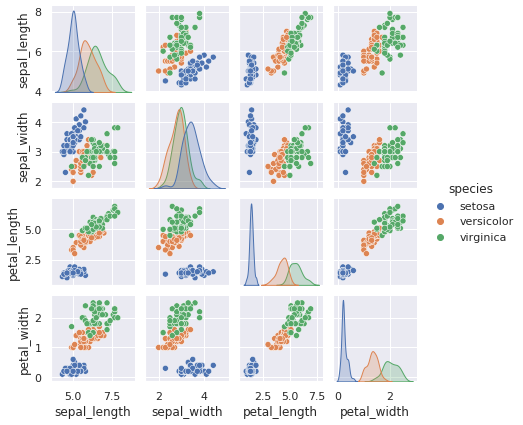

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(data, hue='species', height=1.5);

In [3]:
X_data = data.drop('species', axis=1)
X_data.shape

(150, 4)

In [4]:
y_data = data['species']
y_data.shape

(150,)

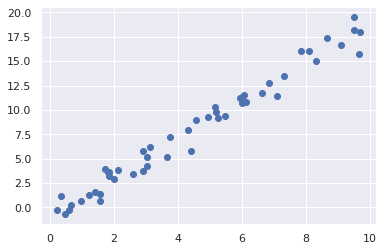

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311164

In [12]:
xfit = np.linspace(-1, 11)

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

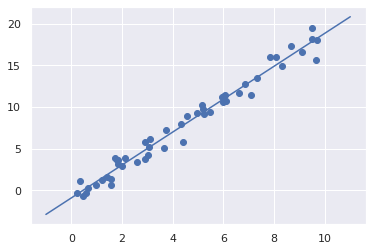

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, y_data, random_state=1)

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [18]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_data)
X_2D = model.transform(X_data)

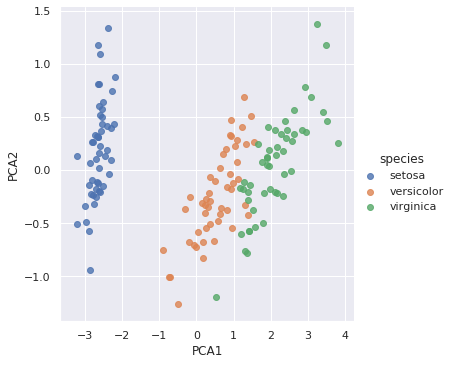

In [19]:
data['PCA1'] = X_2D[:, 0]
data['PCA2'] = X_2D[:, 1]
sns.lmplot(x='PCA1', y='PCA2', hue='species', data=data, fit_reg=False);

In [20]:
# from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture as GMM
model = GMM(n_components=3, covariance_type='full')
model.fit(X_data)
y_gmm = model.predict(X_data)

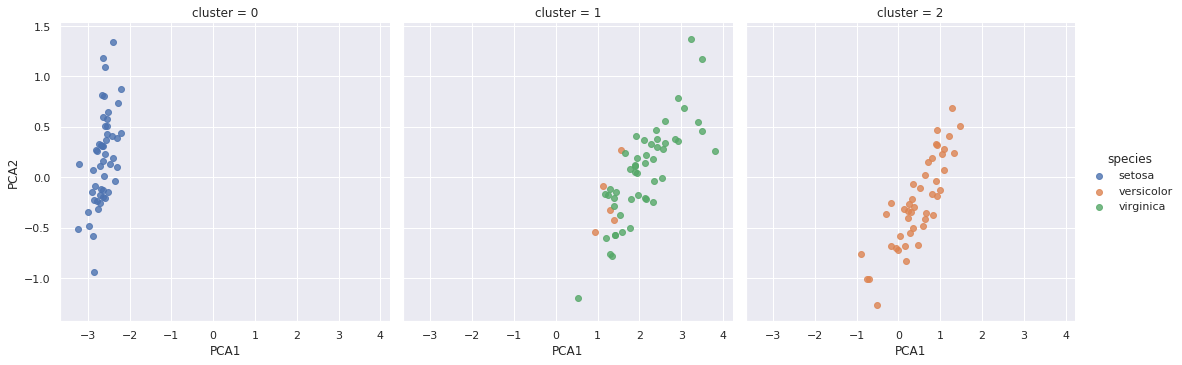

In [21]:
data['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=data, hue='species',
          col='cluster', fit_reg=False);

In [22]:
from sklearn.datasets import load_digits
data = load_digits()
data.images.shape

(1797, 8, 8)

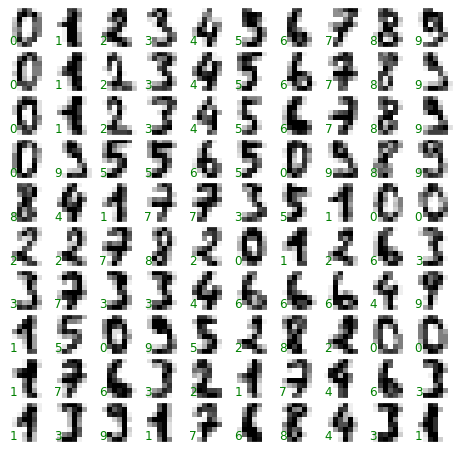

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(data.target[i]),
           transform=ax.transAxes, color='green')

In [24]:
X = data.data
X.shape

(1797, 64)

In [25]:
y = data.target
y.shape

(1797,)

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(data.data)
data_projected = iso.transform(data.data)
data_projected.shape

(1797, 2)

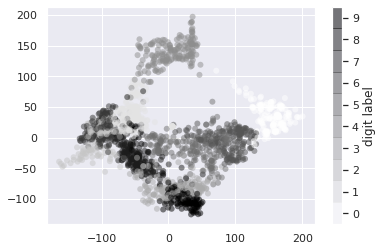

In [27]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=data.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('binary', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain, ytrain)
y_model = model.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

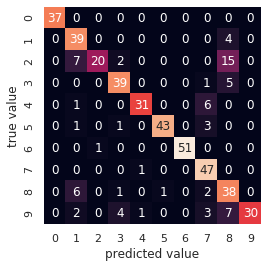

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

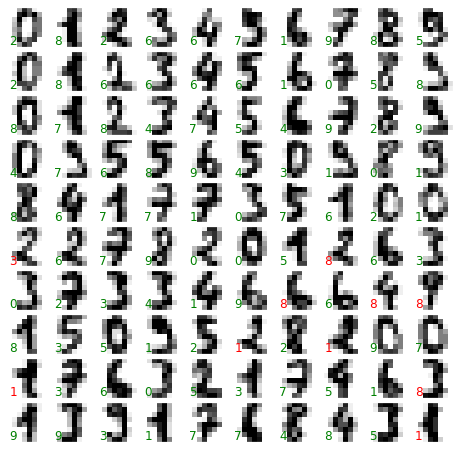

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')